# Import libaries

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

# Read files

In [54]:
email_data=pd.read_csv("D:\PycharmProjects\pythonProject2\email.csv")
email_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data preprocessing


In [55]:
# Delete invalide  categories
valid_categories = ['ham', 'spam']
email_data = email_data[email_data['Category'].isin(valid_categories)]
email_data.shape

(5572, 2)

In [56]:
#Encrypting ham to 0 and spam to 1
email_data['Category'] = email_data['Category'].map({'ham': 0, 'spam': 1})
email_data.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
#Removing special characters and turn all valid characters into lowercase
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

email_data['Message'] = email_data['Message'].apply(clean_text)

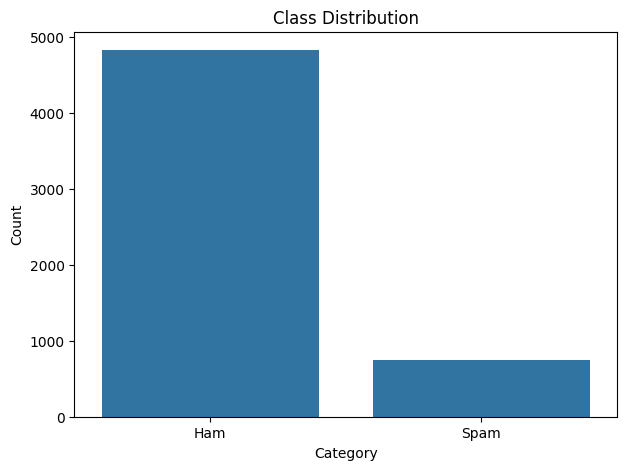

In [63]:
#Checking the the total of spom and ham email
plt.figure(figsize=(7,5))
sns.countplot(x='Category',data=email_data)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()


The total of ham emails overwhelms spam emails so we need to fix the imbalanced data



In [85]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [87]:
#divide the table bt columns
X = email_data['Message']
y = email_data['Category']

# split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Using SMOTE to sovle imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

Category
0    3859
1    3859
Name: count, dtype: int64


# Naive Bayes


In [89]:
# Train with Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict using Test Data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model 
accuracy = accuracy_score(y_test, y_pred)
print("Acurracy:", accuracy)
print(classification_report(y_test, y_pred))

Acurracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.91      0.92      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115

